In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='red'> 1. Generating correlated random variables: In this experiment take 3 zero mean, unit variance, uncorrelated random Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ transformation so that $Y$ have specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity

Hint for Code: Use np.linalg.eig,np.diag,np.matmul,np.cov

In [2]:
no_samples = 1000
x1 = np.random.randn(no_samples)
x2 = np.random.randn(no_samples)
x3 = np.random.randn(no_samples)
X = np.concatenate((np.array([x1]),np.array([x2]),np.array([x3])),axis=0)
Cx = np.cov(X)
print("Cx=",Cx)
Cy = np.array([[1 , 0.8 ,0.5],
               [0.8 , 1 , 0.8],
              [0.5,0.8,1]])
print("Cy=",Cy)
#write code here
eig, eigvec = LA.eig(Cy)
sigma = np.diag(eig)
A = np.matmul(eigvec, np.sqrt(sigma))
Yn = np.matmul(A, X)
Cynew = np.matmul(A, np.matmul(Cx, A.T))
print("Cy_new=",Cynew)


Cx= [[1.08437885 0.04056222 0.02643872]
 [0.04056222 1.02005163 0.0317442 ]
 [0.02643872 0.0317442  0.98510439]]
Cy= [[1.  0.8 0.5]
 [0.8 1.  0.8]
 [0.5 0.8 1. ]]
Cy_new= [[1.09092297 0.89597539 0.55043911]
 [0.89597539 1.09097568 0.84907538]
 [0.55043911 0.84907538 1.03000687]]


## <font color='red'> 2. Understand and implement PCA for image compression and recognition.<font> 
    Methodology: set of face images are to be used to generate basis matrix based on PCA, and the matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved.

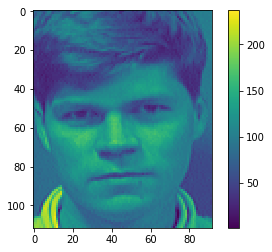

In [3]:
a=glob.glob('*.pgm')
X1 = mpimg.imread(a[0])
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X = X1.flatten()
X = np.zeros(shape=(np.size(a),m*n))
for i,j in zip(a,range(np.size(a))):
    X[j,:]=  mpimg.imread(i).flatten()



[39699.07863685 10182.56227562  5313.19973839  3811.77371633
  3323.6742795   2404.66504431  2032.91965029  1712.21292781
  1613.99635964  1433.05407569  1225.85186798  1126.44313462
  1043.41815229   975.29018526   902.57155038   850.07889381
   831.20407613   797.94663173   759.33689174   253.6525234
   715.86584016   281.36048982   294.95681484   312.95279816
   310.33022909   337.68750616   366.5251289    687.38775663
   655.39411595   404.85022546   426.74404321   441.99573632
   475.87438348   488.73385456   514.93578125   604.63084443
   568.87469893   574.17464063   575.90622763]


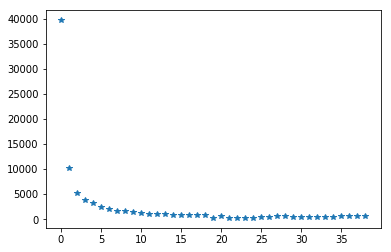

In [4]:
#covariance matrix
CV = np.cov(X)
[eig,U] = LA.eig(CV)
print(eig)
plt.figure()
plt.plot(eig,'*') 

mse= 291.35358326151845


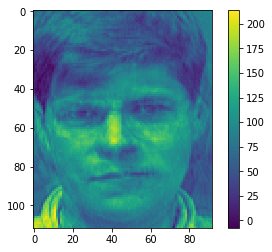

In [5]:
l = np.diag(eig)
A = U.T
Y = np.matmul(A,X)
Yt = Y[0:30,:]
Ut = U[:,0:30]
Xr = np.matmul(Ut, Yt)
mse = np.mean((X-Xr)**2)
print("mse=",mse)
X1r = np.reshape(Xr[0,:],[m,n])
plt.imshow(X1r)
plt.colorbar()

## <font color='red'> 3. Implement PCA for remote sensing image.<font>
    Methodology: set of remotely sensed images (Cuprite hyperspectral data having 188 bands) are to be used to generate basis matrix based on PCA, and the matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

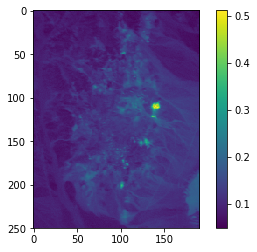

In [6]:
X = sio.loadmat('cuprite.mat')
X= X['x']
X1 = np.reshape(X,[188,191,250])
plt.figure()
plt.imshow(X1[1,:,:].T)
plt.colorbar()

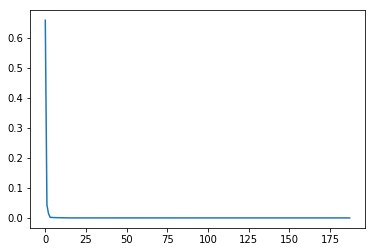

In [7]:
#covariance matrix
CV = np.cov(X1)
[eig,U] = #write code here
plt.figure()
plt.plot(eig) 

mse= 1.8654105340133332e-05


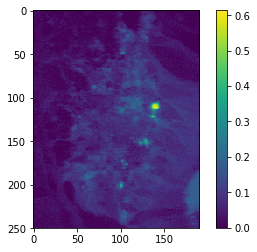

In [8]:
# write code here
mse = np.mean((X-Xr)**2)
print("mse=",mse)
X1r = np.reshape(Xr[0,:],[191,250])
plt.imshow(X1r.T)
plt.colorbar()